In [32]:
from urllib import request
import pandas as pd
from matplotlib import pyplot as plt
import json
import mpld3
from datetime import date


%matplotlib inline
mpld3.enable_notebook()


In [35]:
def check_bucks_covid(keyword):
    
    #Data on deaths and cases
    if keyword=='daily':
        response = request.urlopen('https://services3.arcgis.com/SP47Tddf7RK32lBU/arcgis/rest/services/Buck_County_COVID_Case_Dates_VIEW_2/FeatureServer/0/query?f=json&where=1%3D1&returnGeometry=false&spatialRel=esriSpatialRelIntersects&outFields=*&orderByFields=Date%20asc&resultOffset=0&resultRecordCount=32000&resultType=standard&cacheHint=true')
        dat = response.read()
        data = json.loads(dat)
	#Data on onset of cases
    if keyword=='onset':
        response = request.urlopen('https://services3.arcgis.com/SP47Tddf7RK32lBU/arcgis/rest/services/Bucks_County_COVID_Cases_by_Onset_Date_VIEW/FeatureServer/0/query?f=json&where=1%3D1&returnGeometry=false&spatialRel=esriSpatialRelIntersects&outFields=*&orderByFields=Date%20asc&resultOffset=0&resultRecordCount=32000&resultType=standard&cacheHint=true')
        dat = response.read()
        data = json.loads(dat)

    df = pd.json_normalize(data['features'])
    df['date'] = pd.to_datetime(df['attributes.Date'],unit='ms')

    if keyword=='daily':
        df['cases']= df['attributes.DailyCases']
        df['ma3']= df['attributes.DailyCases'].rolling(3).mean()
        df['ma7']= df['attributes.DailyCases'].rolling(7).mean()
        df['ma11']= df['attributes.DailyCases'].rolling(11).mean()

    if keyword=='onset':
        df['cases']= df['attributes.Onset']
        df['ma3']= df['attributes.Onset'].rolling(3).mean()
        df['ma7']= df['attributes.Onset'].rolling(7).mean()
        df['ma11']= df['attributes.Onset'].rolling(11).mean()

    df['date'] = pd.to_datetime(df['attributes.Date'],unit='ms')

    fig, ax = plt.subplots(figsize=(13,5))

    bar = ax.bar('date', 'cases', data=df, label='Daily Count', alpha=0.7)
    l1 = ax.plot(df['date'], df['cases'], marker='o', markersize=8, alpha=0.00)
    labels =[str(df['cases'][i]) for i in range(len(df['cases']))]
    tt = mpld3.plugins.PointLabelTooltip(l1[0], labels=labels)
    mpld3.plugins.connect(fig, tt)

    l2 = ax.plot(df['date'], df['ma3'], label='3 Day MM',color='C1', linewidth=3)
    l3 = ax.plot(df['date'], df['ma7'], label='7 Day MM',color='C2', linewidth=3)
    l4 = ax.plot('date', 'ma11', data=df, label='11 Day MM',color='C3', linewidth=3)

    plt.title(keyword.capitalize() + ' accessed on '+str(date.today()))


    plt.ylabel('Daily Cases')
    plt.xlabel('Date')
    plt.legend()
    plt.show()

#if __name__ == "__main__":
#    import sys
#    if len(sys.argv)==1:
#    	check_bucks_covid('daily')
#    
#    else:
#    	check_bucks_covid(sys.argv[1])
#plt.close()

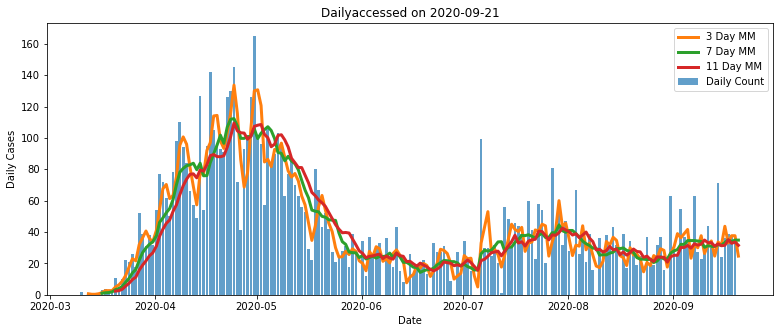

In [36]:
check_bucks_covid('daily')

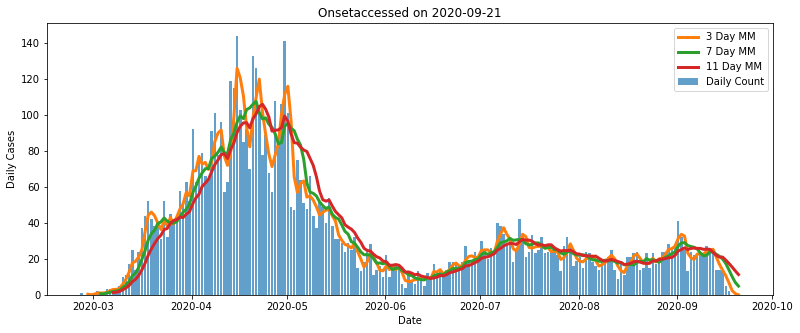

In [37]:
check_bucks_covid('onset')